<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-08-16 18:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Your information:
- Fullname: Nguyễn Minh Trường
- Date of birth: 10/12/1995
- Place of birth: Ho Chi Minh City
- Email: truong.nguyenminh@gmail.com
- Mobile phone: 079 506 4435

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Algorithm** to predict: "price of car" by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

# Data Exploration

## Import dữ liệu và các thông số tổng quát

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
headers = ['Symboling', 'Normalized-losses', 'Make', 'Fuel-type', 'Aspiration', 'Num-of-doors', 'Body-style', 'Drive-wheels'
           ,'Engine-location', 'Wheel-base', 'Length', 'Width', 'Height', 'Curb-weight', 'Engine-type', 'Num-of-cylinders'
           ,'Engine-size', 'Fuel-system', 'Bore', 'Stroke', 'Compression-ratio', 'Horsepower', 'Peak-rpm', 'City-mpg'
           ,'Highway-mpg', 'Price']
data = pd.read_csv('imports_85.csv', names=headers);
data.head()

,Symboling,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
data.shape

(205, 26)

In [4]:
data.tail()

,Symboling,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          205 non-null    int64  
 1   Normalized-losses  205 non-null    object 
 2   Make               205 non-null    object 
 3   Fuel-type          205 non-null    object 
 4   Aspiration         205 non-null    object 
 5   Num-of-doors       205 non-null    object 
 6   Body-style         205 non-null    object 
 7   Drive-wheels       205 non-null    object 
 8   Engine-location    205 non-null    object 
 9   Wheel-base         205 non-null    float64
 10  Length             205 non-null    float64
 11  Width              205 non-null    float64
 12  Height             205 non-null    float64
 13  Curb-weight        205 non-null    int64  
 14  Engine-type        205 non-null    object 
 15  Num-of-cylinders   205 non-null    object 
 16  Engine-size        205 non

In [6]:
data.isnull().sum()

Symboling            0
Normalized-losses    0
Make                 0
Fuel-type            0
Aspiration           0
Num-of-doors         0
Body-style           0
Drive-wheels         0
Engine-location      0
Wheel-base           0
Length               0
Width                0
Height               0
Curb-weight          0
Engine-type          0
Num-of-cylinders     0
Engine-size          0
Fuel-system          0
Bore                 0
Stroke               0
Compression-ratio    0
Horsepower           0
Peak-rpm             0
City-mpg             0
Highway-mpg          0
Price                0
dtype: int64

In [7]:
numbers = [f for f in data.columns if data.dtypes[f] != 'object']
numbers

['Symboling',
 'Wheel-base',
 'Length',
 'Width',
 'Height',
 'Curb-weight',
 'Engine-size',
 'Compression-ratio',
 'City-mpg',
 'Highway-mpg']

In [8]:
objects = [f for f in data.columns if data.dtypes[f] == 'object']
objects

['Normalized-losses',
 'Make',
 'Fuel-type',
 'Aspiration',
 'Num-of-doors',
 'Body-style',
 'Drive-wheels',
 'Engine-location',
 'Engine-type',
 'Num-of-cylinders',
 'Fuel-system',
 'Bore',
 'Stroke',
 'Horsepower',
 'Peak-rpm',
 'Price']

In [9]:
i = 1
for obj in objects:
    print(i, '/', obj, '\t', len(data[obj].unique()), ':', data[obj].unique())
    i = i + 1

1 / Normalized-losses 	 52 : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
2 / Make 	 22 : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
3 / Fuel-type 	 2 : ['gas' 'diesel']
4 / Aspiration 	 2 : ['std' 'turbo']
5 / Num-of-doors 	 3 : ['two' 'four' '?']
6 / Body-style 	 5 : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
7 / Drive-wheels 	 3 : ['rwd' 'fwd' '4wd']
8 / Engine-location 	 2 : ['front' 'rear']
9 / Engine-type 	 7 : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
10 / Num-of-cylinders 	 7 : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
11 / F

In [10]:
i = 1
for obj in numbers:
    print(i, '/', obj, '\t', len(data[obj].unique()), ':', data[obj].unique())
    i = i + 1

1 / Symboling 	 6 : [ 3  1  2  0 -1 -2]
2 / Wheel-base 	 53 : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
3 / Length 	 75 : [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]
4 / Width 	 44 : [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7

## Xử lý dữ liệu bị thiếu

In [11]:
data.replace(to_replace="?", value=np.NAN, inplace=True)
data.head()

,Symboling,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          205 non-null    int64  
 1   Normalized-losses  164 non-null    object 
 2   Make               205 non-null    object 
 3   Fuel-type          205 non-null    object 
 4   Aspiration         205 non-null    object 
 5   Num-of-doors       203 non-null    object 
 6   Body-style         205 non-null    object 
 7   Drive-wheels       205 non-null    object 
 8   Engine-location    205 non-null    object 
 9   Wheel-base         205 non-null    float64
 10  Length             205 non-null    float64
 11  Width              205 non-null    float64
 12  Height             205 non-null    float64
 13  Curb-weight        205 non-null    int64  
 14  Engine-type        205 non-null    object 
 15  Num-of-cylinders   205 non-null    object 
 16  Engine-size        205 non

In [13]:
data.isnull().sum()

Symboling             0
Normalized-losses    41
Make                  0
Fuel-type             0
Aspiration            0
Num-of-doors          2
Body-style            0
Drive-wheels          0
Engine-location       0
Wheel-base            0
Length                0
Width                 0
Height                0
Curb-weight           0
Engine-type           0
Num-of-cylinders      0
Engine-size           0
Fuel-system           0
Bore                  4
Stroke                4
Compression-ratio     0
Horsepower            2
Peak-rpm              2
City-mpg              0
Highway-mpg           0
Price                 4
dtype: int64

Đối với thuộc tính **Price**: Số lượng dòng chứa giá trị Null không nhiều và không thể thay thế bằng giá trị khác nên ta có thể xóa đi

In [14]:
data.dropna(subset=['Price'], axis=0, inplace=True)
data.reset_index(drop=True,inplace=True)

In [15]:
data.isnull().sum()

Symboling             0
Normalized-losses    37
Make                  0
Fuel-type             0
Aspiration            0
Num-of-doors          2
Body-style            0
Drive-wheels          0
Engine-location       0
Wheel-base            0
Length                0
Width                 0
Height                0
Curb-weight           0
Engine-type           0
Num-of-cylinders      0
Engine-size           0
Fuel-system           0
Bore                  4
Stroke                4
Compression-ratio     0
Horsepower            2
Peak-rpm              2
City-mpg              0
Highway-mpg           0
Price                 0
dtype: int64

Đối với các thuộc tính **Normalized-losses, Stroke, Bore, Horsepower, Peak-rpm**:

In [16]:
data[['Normalized-losses', 'Stroke', 'Bore', 'Horsepower', 'Peak-rpm']].astype(float).describe()

,Normalized-losses,Stroke,Bore,Horsepower,Peak-rpm
count,164.000000,197.000000,197.000000,199.000000,199.000000
mean,122.000000,3.256904,3.330711,103.396985,5117.587940
std,35.442168,0.319256,0.270793,37.553843,480.521824
min,65.000000,2.070000,2.540000,48.000000,4150.000000
25%,94.000000,3.110000,3.150000,70.000000,4800.000000
50%,115.000000,3.290000,3.310000,95.000000,5200.000000
75%,150.000000,3.410000,3.590000,116.000000,5500.000000
max,256.000000,4.170000,3.940000,262.000000,6600.000000


Đối với các thuộc tính **Normalized-losses, Horsepower và Peak-rpm**, ta thấy giá trị mean và giá trị "50%" có sự chênh lệch không đáng kể.
=> Có thể thay thế các null value của các thuộc tính trên bằng giá trị mean

In [17]:
data['Normalized-losses'].fillna(data['Normalized-losses'].astype("float").mean(), inplace= True)
data['Horsepower'].fillna(data['Horsepower'].astype("float").mean(), inplace= True)
data['Peak-rpm'].fillna(data['Peak-rpm'].astype("float").mean(), inplace= True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          201 non-null    int64  
 1   Normalized-losses  201 non-null    object 
 2   Make               201 non-null    object 
 3   Fuel-type          201 non-null    object 
 4   Aspiration         201 non-null    object 
 5   Num-of-doors       199 non-null    object 
 6   Body-style         201 non-null    object 
 7   Drive-wheels       201 non-null    object 
 8   Engine-location    201 non-null    object 
 9   Wheel-base         201 non-null    float64
 10  Length             201 non-null    float64
 11  Width              201 non-null    float64
 12  Height             201 non-null    float64
 13  Curb-weight        201 non-null    int64  
 14  Engine-type        201 non-null    object 
 15  Num-of-cylinders   201 non-null    object 
 16  Engine-size        201 non

Đối với thuộc tính **Bore và Stroke**:

In [19]:
data[['Bore', 'Stroke', 'Make','Num-of-cylinders', 'Engine-size']][(data['Bore'].isnull())]

,Bore,Stroke,Make,Num-of-cylinders,Engine-size
52,NaN,NaN,mazda,two,70
53,NaN,NaN,mazda,two,70
54,NaN,NaN,mazda,two,70
55,NaN,NaN,mazda,two,80


Ta có thể thấy các dòng dữ liệu có thuộc tính Bore và Stroke bị null đều nằm ở dòng xe 'mazda' và có Num-of-cylinders == two (2). Với dữ liệu NotNull của dòng xe này ta có công thức:
$$\frac{(Bore)^2 * \pi * Stroke}{4} * NumOfCylinders = EngineSize$$

+ Stroke: Mean ~ 3.2, Min ~ 2.0, Max ~ 4.1
+ Bore: Mean ~ 3.3, Min ~ 2.5, Max ~ 3.9
<br>=> Chọn:
    + Engine-size = 70 => Bore = 3.5 và Stroke = 3.65
    + Engine-size = 80 => Bore = 3.7 và Stroke = 3.74

In [20]:
data.loc[data['Bore'][(data['Make'] == 'mazda') & (data['Engine-size'] == 70) & (data['Bore'].isnull())].index, 'Bore'] = 3.5
data.loc[data['Bore'][(data['Make'] == 'mazda') & (data['Engine-size'] == 80) & (data['Bore'].isnull())].index, 'Bore'] = 3.7

data.loc[data['Stroke'][(data['Make'] == 'mazda') & (data['Engine-size'] == 70) & (data['Stroke'].isnull())].index, 'Stroke'] = 3.65
data.loc[data['Stroke'][(data['Make'] == 'mazda') & (data['Engine-size'] == 80) & (data['Stroke'].isnull())].index, 'Stroke'] = 3.74

### Đổi dữ liệu chữ số thành số - Thuộc tính Num-of-Cylinders

In [21]:
d = {'eight': 8, 'five': 5, 'four': 4, 'six': 6, 'three': 3, 'twelve': 12, 'two': 2}
data['Num-of-Cylinders-number'] = data['Num-of-cylinders'].map(d)

In [22]:
data[['Num-of-cylinders','Num-of-Cylinders-number']].head()

,Num-of-cylinders,Num-of-Cylinders-number
0,four,4
1,four,4
2,six,6
3,four,4
4,five,5


#### Thuộc tính num-of-doors:

In [23]:
data['Num-of-doors'].describe()

count      199
unique       2
top       four
freq       113
Name: Num-of-doors, dtype: object

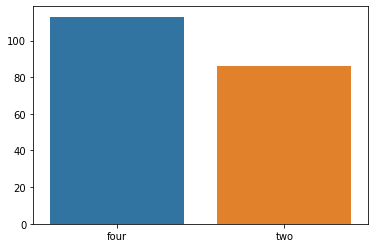

<Figure size 432x288 with 0 Axes>

In [24]:
door = data['Num-of-doors'].value_counts()
sns.barplot(door.index.values, door.values);
plt.show();
plt.clf();

Trong thuộc tính "Num-of-doors", nhóm dữ liệu "four" chiếm đa số hơn nhưng không gây ra sự mất cân bằng. 
Ta có thể thay thế các missing value thành "four"

In [25]:
data['Num-of-doors'].fillna("four", inplace=True)

In [26]:
data['Num-of-doors-number'] = data['Num-of-doors'].map({'four': 4, 'two': 2})
data[['Num-of-doors-number','Num-of-doors']].head()

,Num-of-doors-number,Num-of-doors
0,2,two
1,2,two
2,2,two
3,4,four
4,4,four


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Symboling                201 non-null    int64  
 1   Normalized-losses        201 non-null    object 
 2   Make                     201 non-null    object 
 3   Fuel-type                201 non-null    object 
 4   Aspiration               201 non-null    object 
 5   Num-of-doors             201 non-null    object 
 6   Body-style               201 non-null    object 
 7   Drive-wheels             201 non-null    object 
 8   Engine-location          201 non-null    object 
 9   Wheel-base               201 non-null    float64
 10  Length                   201 non-null    float64
 11  Width                    201 non-null    float64
 12  Height                   201 non-null    float64
 13  Curb-weight              201 non-null    int64  
 14  Engine-type              2

### Chuyển các thuộc tính sang số:

In [28]:
data[['Price','Stroke', 'Bore', 'Peak-rpm']] = data[['Price','Stroke', 'Bore', 'Peak-rpm']].astype(float)

In [29]:
data[['Normalized-losses', 'Horsepower']] = data[['Normalized-losses', 'Horsepower']].astype('int64')

In [30]:
data.dtypes

Symboling                    int64
Normalized-losses            int64
Make                        object
Fuel-type                   object
Aspiration                  object
Num-of-doors                object
Body-style                  object
Drive-wheels                object
Engine-location             object
Wheel-base                 float64
Length                     float64
Width                      float64
Height                     float64
Curb-weight                  int64
Engine-type                 object
Num-of-cylinders            object
Engine-size                  int64
Fuel-system                 object
Bore                       float64
Stroke                     float64
Compression-ratio          float64
Horsepower                   int64
Peak-rpm                   float64
City-mpg                     int64
Highway-mpg                  int64
Price                      float64
Num-of-Cylinders-number      int64
Num-of-doors-number          int64
dtype: object

### Xóa những cột đã chuyển thành số:

In [31]:
data.drop(['Num-of-doors', 'Num-of-cylinders'], axis=1, inplace=True)

In [32]:
data.head()

,Symboling,Normalized-losses,Make,Fuel-type,Aspiration,Body-style,Drive-wheels,Engine-location,Wheel-base,Length,...,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Num-of-Cylinders-number,Num-of-doors-number
0,3,122,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,4,2
1,3,122,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,4,2
2,1,122,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,6,2
3,2,164,audi,gas,std,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,4,4
4,2,164,audi,gas,std,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,5,4


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Symboling                201 non-null    int64  
 1   Normalized-losses        201 non-null    int64  
 2   Make                     201 non-null    object 
 3   Fuel-type                201 non-null    object 
 4   Aspiration               201 non-null    object 
 5   Body-style               201 non-null    object 
 6   Drive-wheels             201 non-null    object 
 7   Engine-location          201 non-null    object 
 8   Wheel-base               201 non-null    float64
 9   Length                   201 non-null    float64
 10  Width                    201 non-null    float64
 11  Height                   201 non-null    float64
 12  Curb-weight              201 non-null    int64  
 13  Engine-type              201 non-null    object 
 14  Engine-size              2

# Khảo sát các thuộc tính:

In [34]:
numbers = [f for f in data.columns if data.dtypes[f] != 'object']
numbers

['Symboling',
 'Normalized-losses',
 'Wheel-base',
 'Length',
 'Width',
 'Height',
 'Curb-weight',
 'Engine-size',
 'Bore',
 'Stroke',
 'Compression-ratio',
 'Horsepower',
 'Peak-rpm',
 'City-mpg',
 'Highway-mpg',
 'Price',
 'Num-of-Cylinders-number',
 'Num-of-doors-number']

In [35]:
objects = [f for f in data.columns if data.dtypes[f] == 'object']
objects

['Make',
 'Fuel-type',
 'Aspiration',
 'Body-style',
 'Drive-wheels',
 'Engine-location',
 'Engine-type',
 'Fuel-system']

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Symboling                201 non-null    int64  
 1   Normalized-losses        201 non-null    int64  
 2   Make                     201 non-null    object 
 3   Fuel-type                201 non-null    object 
 4   Aspiration               201 non-null    object 
 5   Body-style               201 non-null    object 
 6   Drive-wheels             201 non-null    object 
 7   Engine-location          201 non-null    object 
 8   Wheel-base               201 non-null    float64
 9   Length                   201 non-null    float64
 10  Width                    201 non-null    float64
 11  Height                   201 non-null    float64
 12  Curb-weight              201 non-null    int64  
 13  Engine-type              201 non-null    object 
 14  Engine-size              2

### Continuous Variables

In [37]:
def ExploreContVariable(column):
    slice = data[column]
    plt.figure(figsize = (16,6))
    plt.subplot(1,3,1)
    plt.hist(slice)
    plt.subplot(1,3,2)
    sns.distplot(slice)
    plt.subplot(1,3,3)
    slice.plot.box()
    plt.tight_layout()
    plt.show()

    print('Skew: ',slice.skew())
    print(slice.describe())
    Q1 = np.percentile(slice.dropna(), 25)
    Q3 = np.percentile(slice.dropna(), 75)
    IQR = scipy.stats.iqr(slice.dropna())
    n_O_upper = data[slice > (Q3 + 1.5*IQR)].shape[0]
    n_O_lower = data[slice < (Q1 - 1.5*IQR)].shape[0]
    print('Upper outlier:', n_O_upper, ',', 'Lower outlier', n_O_lower)
    print('Percent of outlier: ', (n_O_lower + n_O_upper)*100/slice.shape[0])
    
    if (n_O_lower + n_O_upper) != 0:
        df_check = data.copy()
        df_check = df_check[((df_check[column]) <= (Q3 + 1.5 * IQR)) & ((df_check[column]) >= (Q1 - 1.5 * IQR))]
        print('Mean of Data before drop outlier: ', slice.mean())
        print('Mean of Data after drop outlier: ', df_check[column].mean())
        print('Skew of Data after drop outlier: ', df_check[column].skew())

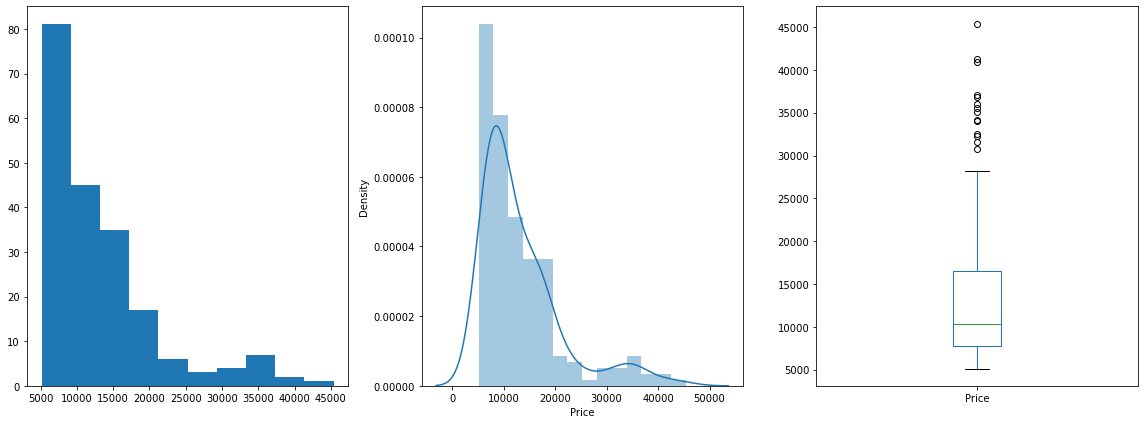

Skew:  1.8096753390980749
count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: Price, dtype: float64
Upper outlier: 14 , Lower outlier 0
Percent of outlier:  6.965174129353234
Mean of Data before drop outlier:  13207.129353233831
Mean of Data after drop outlier:  11503.176470588236
Skew of Data after drop outlier:  1.0207393926548138


In [38]:
ExploreContVariable('Price')

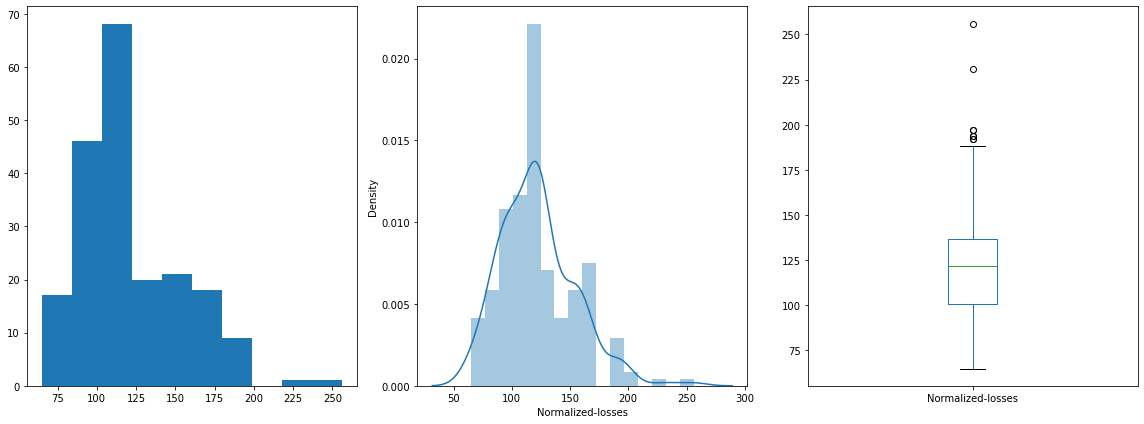

Skew:  0.8465463512727495
count    201.00000
mean     122.00000
std       31.99625
min       65.00000
25%      101.00000
50%      122.00000
75%      137.00000
max      256.00000
Name: Normalized-losses, dtype: float64
Upper outlier: 8 , Lower outlier 0
Percent of outlier:  3.9800995024875623
Mean of Data before drop outlier:  122.0
Mean of Data after drop outlier:  118.49222797927462
Skew of Data after drop outlier:  0.2659083217413951


In [39]:
ExploreContVariable('Normalized-losses')

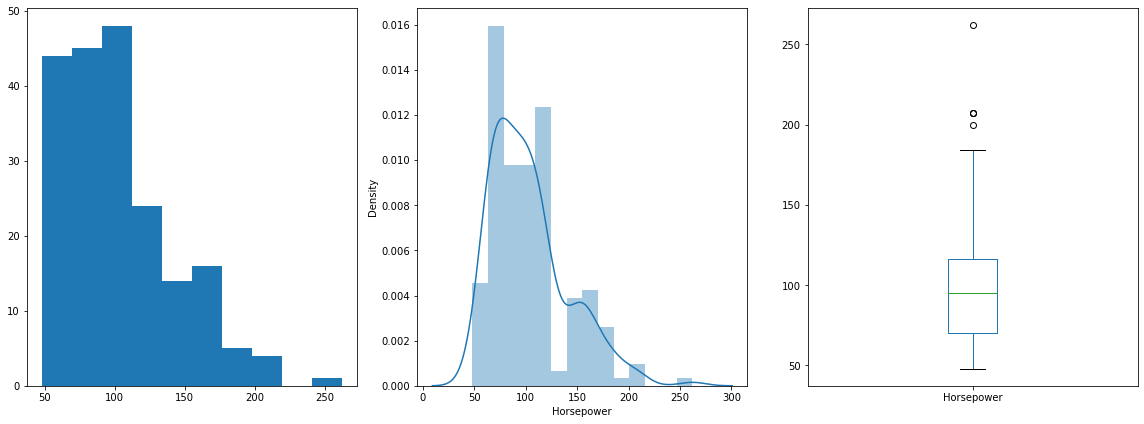

Skew:  1.1475378818932582
count    201.000000
mean     103.393035
std       37.365623
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: Horsepower, dtype: float64
Upper outlier: 5 , Lower outlier 0
Percent of outlier:  2.487562189054726
Mean of Data before drop outlier:  103.39303482587064
Mean of Data after drop outlier:  100.50510204081633
Skew of Data after drop outlier:  0.7949984753269154


In [40]:
ExploreContVariable('Horsepower')

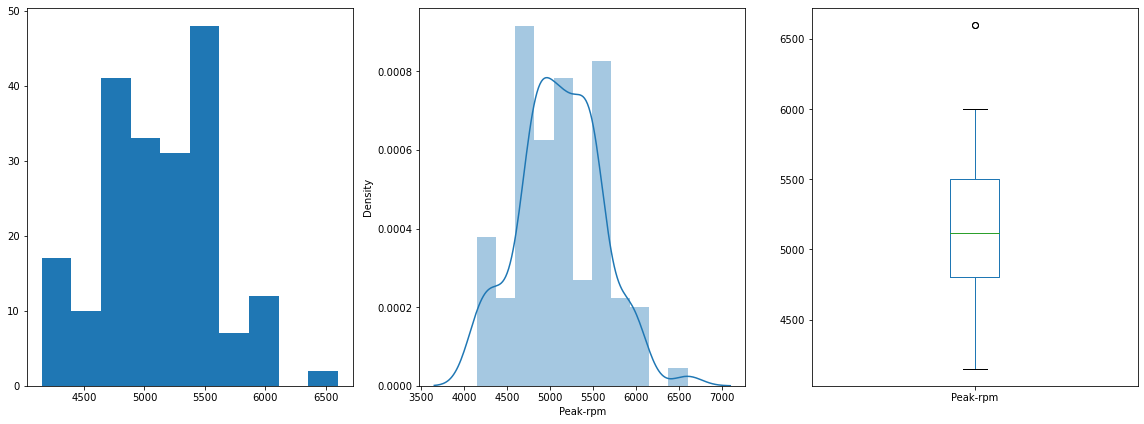

Skew:  0.10826107052388645
count     201.000000
mean     5117.587940
std       478.113178
min      4150.000000
25%      4800.000000
50%      5117.587940
75%      5500.000000
max      6600.000000
Name: Peak-rpm, dtype: float64
Upper outlier: 2 , Lower outlier 0
Percent of outlier:  0.9950248756218906
Mean of Data before drop outlier:  5117.587939698492
Mean of Data after drop outlier:  5102.689326027121
Skew of Data after drop outlier:  -0.12470350261324893


In [41]:
ExploreContVariable('Peak-rpm')

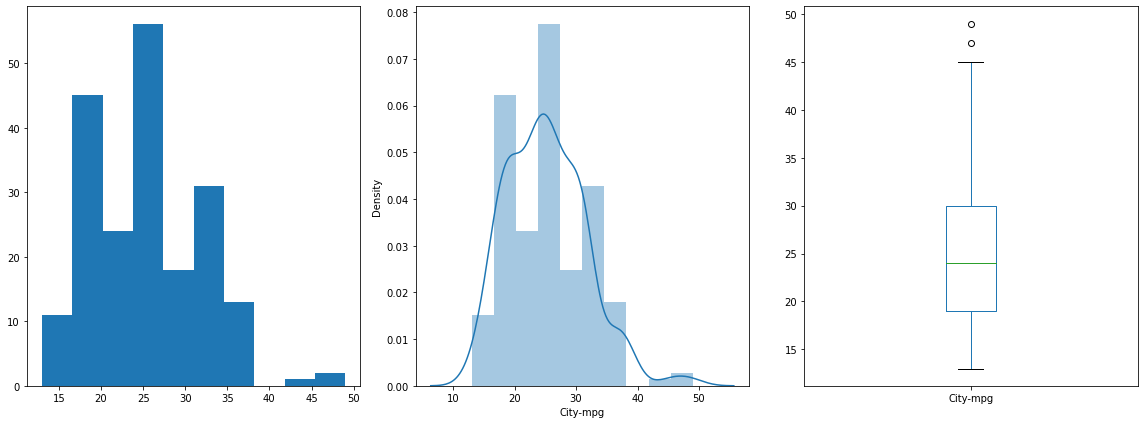

Skew:  0.6804334707346078
count    201.000000
mean      25.179104
std        6.423220
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: City-mpg, dtype: float64
Upper outlier: 2 , Lower outlier 0
Percent of outlier:  0.9950248756218906
Mean of Data before drop outlier:  25.17910447761194
Mean of Data after drop outlier:  24.949748743718594
Skew of Data after drop outlier:  0.3899794284373642


In [42]:
ExploreContVariable('City-mpg')

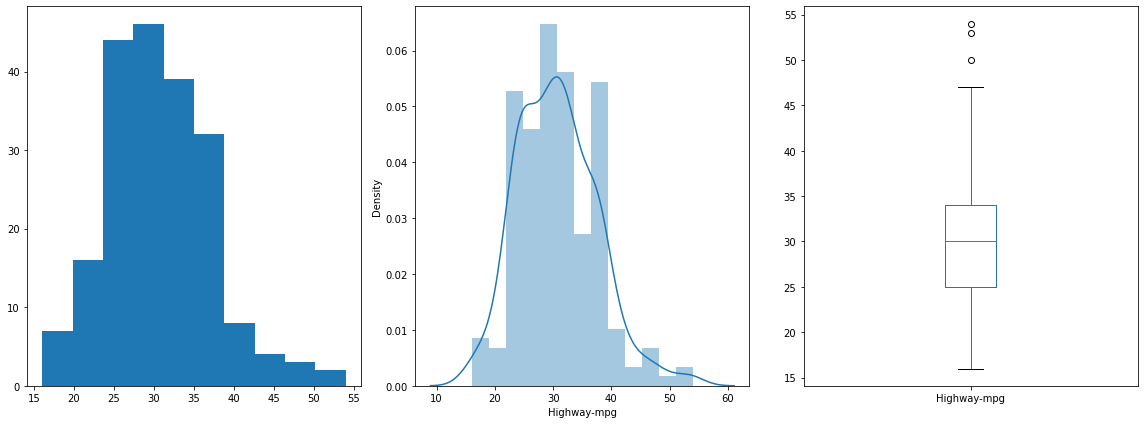

Skew:  0.5495071459179158
count    201.000000
mean      30.686567
std        6.815150
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: Highway-mpg, dtype: float64
Upper outlier: 3 , Lower outlier 0
Percent of outlier:  1.492537313432836
Mean of Data before drop outlier:  30.686567164179106
Mean of Data after drop outlier:  30.358585858585858
Skew of Data after drop outlier:  0.22799591572038638


In [43]:
ExploreContVariable('Highway-mpg')

### Categorical Variables

In [44]:
def ExploreCateVariable(column):
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))
    sns.boxplot(data = data, y = 'Price', x = column, ax = ax1)
    sns.histplot(data = data, x = column)
    f.suptitle(column)
    plt.show()

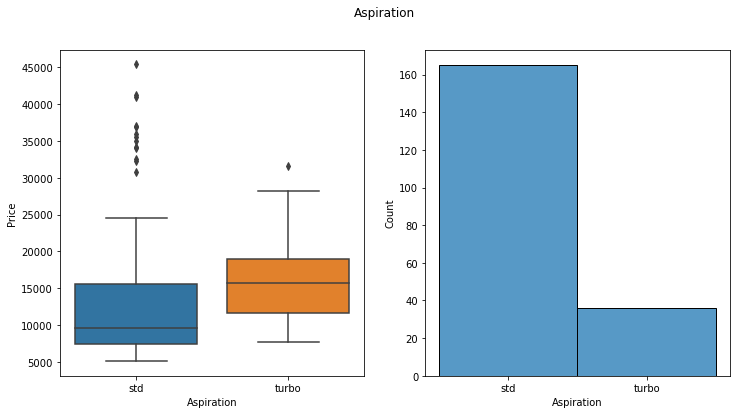

In [45]:
ExploreCateVariable('Aspiration')

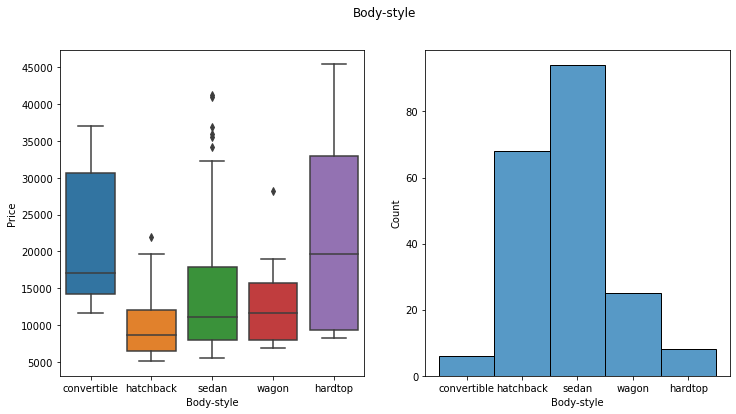

In [46]:
ExploreCateVariable('Body-style')

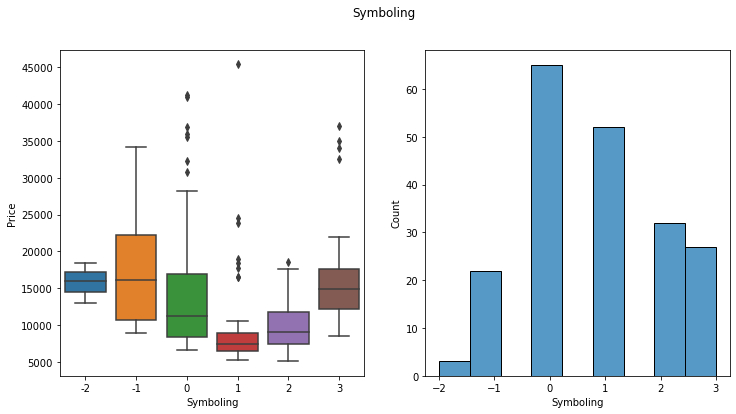

In [47]:
ExploreCateVariable('Symboling')

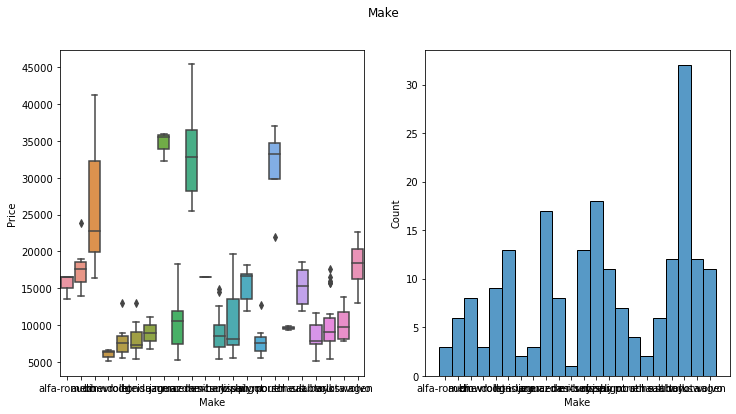

In [48]:
ExploreCateVariable('Make')

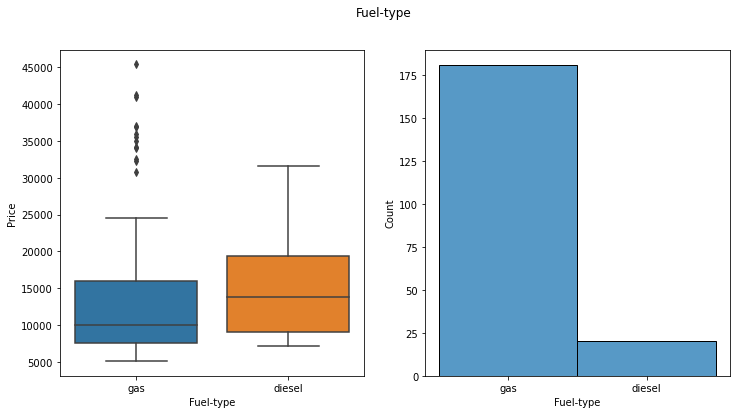

In [49]:
ExploreCateVariable('Fuel-type')

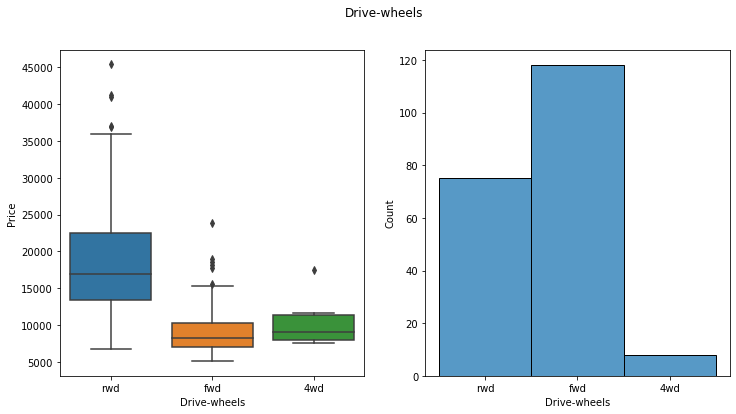

In [50]:
ExploreCateVariable('Drive-wheels')

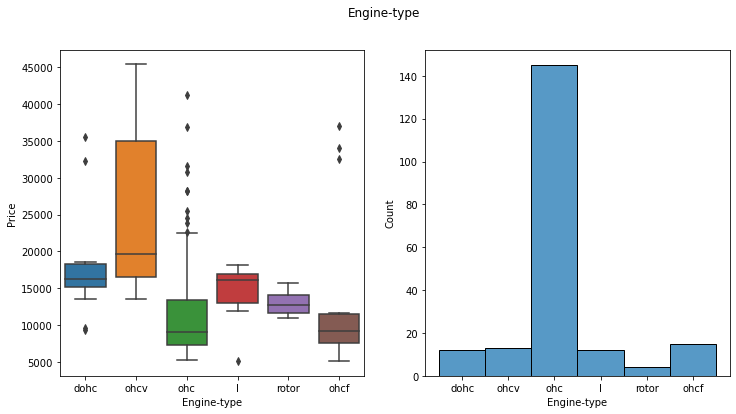

In [51]:
ExploreCateVariable('Engine-type')

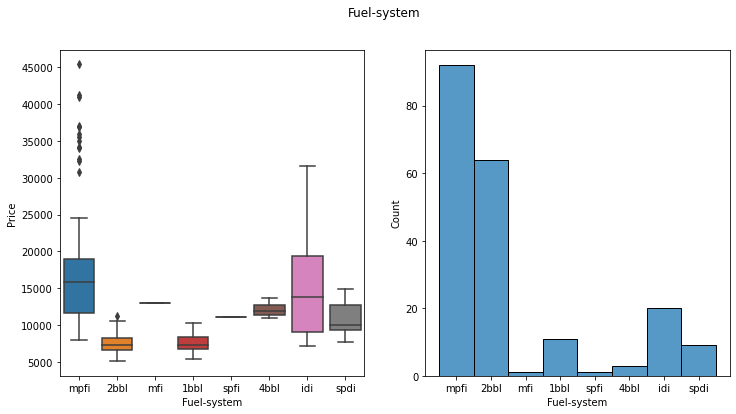

In [52]:
ExploreCateVariable('Fuel-system')

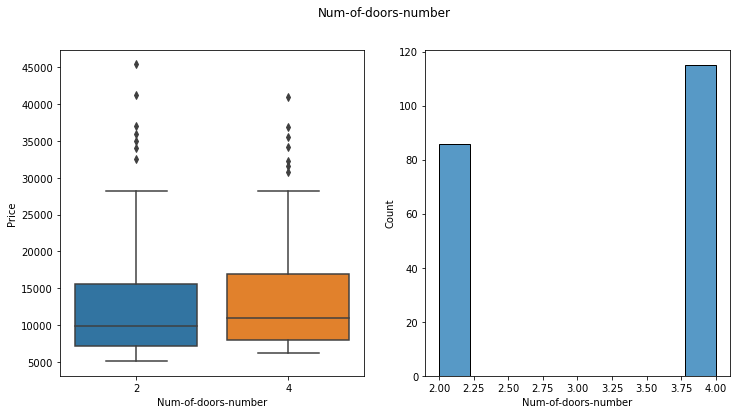

In [53]:
ExploreCateVariable('Num-of-doors-number')

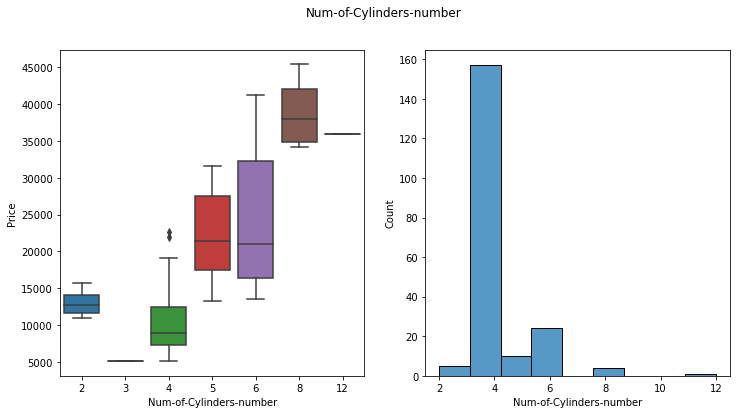

In [54]:
ExploreCateVariable('Num-of-Cylinders-number')

## Biến đổi dữ liệu

In [55]:
data.describe()

,Symboling,Normalized-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Num-of-Cylinders-number,Num-of-doors-number
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.335075,3.265174,10.164279,103.393035,5117.587940,25.179104,30.686567,13207.129353,4.363184,3.144279
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270102,0.321406,4.004965,37.365623,478.113178,6.423220,6.815150,7947.066342,1.059452,0.992008
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,2.000000,2.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,4.000000,2.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000,4.000000,4.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,4.000000,4.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,12.000000,4.000000


In [56]:
dummy_variable = pd.get_dummies(data["Aspiration"])
dummy_variable.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [57]:
data['Aspiration'].value_counts()

std      165
turbo     36
Name: Aspiration, dtype: int64

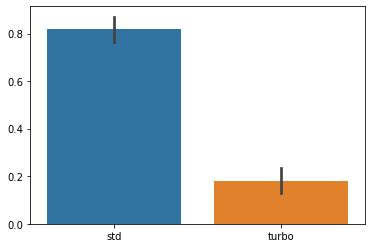

In [58]:
dummy_variable.head()
sns.barplot(data = dummy_variable)

#### Nhận xét: Dữ liệu bị mất cân bằng quá lớn, không thế đem Aspiration vào mô hình dự đoán Price

In [59]:
dummy_variable = pd.get_dummies(data["Fuel-type"])
dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


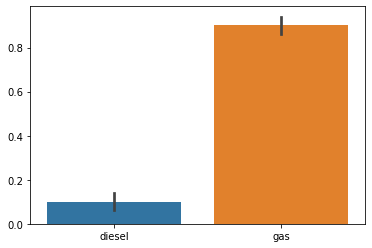

In [60]:
dummy_variable.head()
sns.barplot(data = dummy_variable)

#### Nhận xét: Dữ liệu bị mất cân bằng quá lớn, không thế đem Fuel-type vào mô hình dự đoán Price

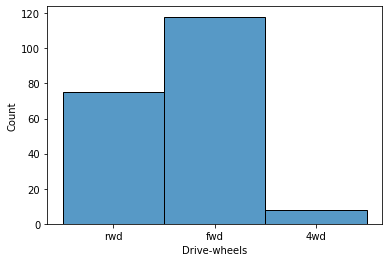

In [61]:
sns.histplot(data = data, x = 'Drive-wheels')
plt.show()

#### Nhận xét: Dữ liệu Drive-wheel tuy có mất cân bằng nhưng có thể chia thành 2 nhóm fwd và not-fwd để đưa vào mô hình

In [62]:
data["Drive-wheels"].replace(to_replace="4wd", value="not-fwd", inplace=True)
data["Drive-wheels"].replace(to_replace="rwd", value="not-fwd", inplace=True)

In [63]:
dummy_variable = pd.get_dummies(data["Drive-wheels"])
dummy_variable.head()

,fwd,not-fwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [64]:
data = pd.concat([data, dummy_variable], axis=1)

In [65]:
dummy_variable = pd.get_dummies(data["Engine-location"])
dummy_variable.head()

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [66]:
data['Engine-location'].value_counts()

front    198
rear       3
Name: Engine-location, dtype: int64

#### Nhận xét: Dữ liệu bị mất cân bằng quá lớn, không thế đem Engine-location vào mô hình dự đoán Price

In [67]:
dummy_variable = pd.get_dummies(data["Engine-type"])
dummy_variable.head()

,dohc,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [68]:
data['Engine-type'].value_counts()

ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: Engine-type, dtype: int64

#### Nhận xét: Dữ liệu bị mất cân bằng quá lớn, không thế đem Engine-location vào mô hình dự đoán Price

In [69]:
dummy_variable = pd.get_dummies(data["Fuel-system"])
dummy_variable.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [70]:
data['Fuel-system'].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: Fuel-system, dtype: int64

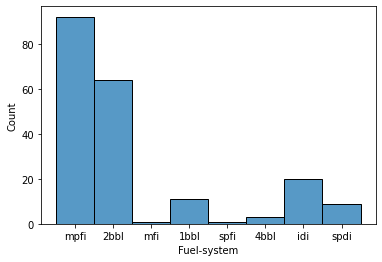

In [71]:
sns.histplot(data = data, x = 'Fuel-system')
plt.show()

#### Nhận xét: Tuy có sự chênh lệch lớn về mặt dữ liệu nhưng ta có thể chia ra 2 nhóm nhỏ là "mpfi" và "another_fuel_system" để đưa vào mô hình dự đoán cho Price

In [72]:
data["Fuel-system"][~data["Fuel-system"].str.contains("mpfi")] = "another_fuel_system"

In [73]:
dummy_variable = pd.get_dummies(data["Fuel-system"])

data = pd.concat([data, dummy_variable], axis=1)
dummy_variable.head()

,another_fuel_system,mpfi
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [74]:
data.drop(['Fuel-type', 'Aspiration', 'Drive-wheels', 'Engine-location', "Engine-type", 'Fuel-system'], axis=1, inplace=True)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Symboling                201 non-null    int64  
 1   Normalized-losses        201 non-null    int64  
 2   Make                     201 non-null    object 
 3   Body-style               201 non-null    object 
 4   Wheel-base               201 non-null    float64
 5   Length                   201 non-null    float64
 6   Width                    201 non-null    float64
 7   Height                   201 non-null    float64
 8   Curb-weight              201 non-null    int64  
 9   Engine-size              201 non-null    int64  
 10  Bore                     201 non-null    float64
 11  Stroke                   201 non-null    float64
 12  Compression-ratio        201 non-null    float64
 13  Horsepower               201 non-null    int64  
 14  Peak-rpm                 2

## Scale dữ liệu

In [76]:
scale_data = data[['Height','Width','Length']]
scale_data.head()

,Height,Width,Length
0,48.8,64.1,168.8
1,48.8,64.1,168.8
2,52.4,65.5,171.2
3,54.3,66.2,176.6
4,54.3,66.4,176.6


In [77]:
scaler = preprocessing.MinMaxScaler()
mm_scaler = scaler.fit_transform(scale_data)
df_scaler = pd.DataFrame(mm_scaler, columns=['Height_new', 'Width_new', 'Length_new'])
df_scaler.head()

,Height_new,Width_new,Length_new
0,0.083333,0.324786,0.413433
1,0.083333,0.324786,0.413433
2,0.383333,0.444444,0.449254
3,0.541667,0.504274,0.529851
4,0.541667,0.521368,0.529851


In [78]:
scale_data[['Height_new', 'Width_new', 'Length_new']] = df_scaler[['Height_new', 'Width_new', 'Length_new']]
scale_data.head()

,Height,Width,Length,Height_new,Width_new,Length_new
0,48.8,64.1,168.8,0.083333,0.324786,0.413433
1,48.8,64.1,168.8,0.083333,0.324786,0.413433
2,52.4,65.5,171.2,0.383333,0.444444,0.449254
3,54.3,66.2,176.6,0.541667,0.504274,0.529851
4,54.3,66.4,176.6,0.541667,0.521368,0.529851


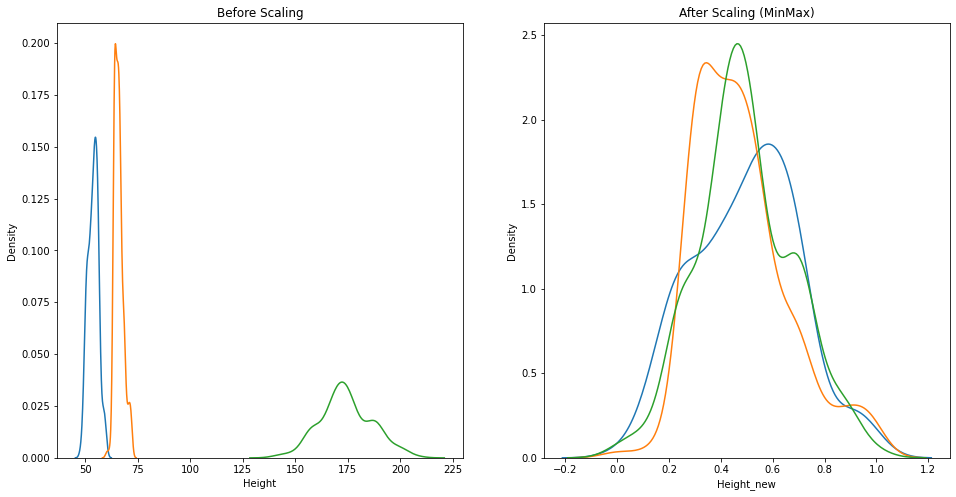

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize= (16,8))
ax1.set_title('Before Scaling')
sns.kdeplot(scale_data['Height'], ax = ax1)
sns.kdeplot(scale_data['Width'], ax = ax1)
sns.kdeplot(scale_data['Length'], ax = ax1)
ax2.set_title('After Scaling (MinMax)')
sns.kdeplot(scale_data['Height_new'], ax = ax2)
sns.kdeplot(scale_data['Width_new'], ax = ax2)
sns.kdeplot(scale_data['Length_new'], ax = ax2)

In [80]:
data[['Height_new', 'Width_new', 'Length_new']] = df_scaler[['Height_new', 'Width_new', 'Length_new']]
data.drop(['Height','Width','Length'], axis = 1 , inplace = True)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Symboling                201 non-null    int64  
 1   Normalized-losses        201 non-null    int64  
 2   Make                     201 non-null    object 
 3   Body-style               201 non-null    object 
 4   Wheel-base               201 non-null    float64
 5   Curb-weight              201 non-null    int64  
 6   Engine-size              201 non-null    int64  
 7   Bore                     201 non-null    float64
 8   Stroke                   201 non-null    float64
 9   Compression-ratio        201 non-null    float64
 10  Horsepower               201 non-null    int64  
 11  Peak-rpm                 201 non-null    float64
 12  City-mpg                 201 non-null    int64  
 13  Highway-mpg              201 non-null    int64  
 14  Price                    2

## Mối tương quan giữa các thuộc tính

In [82]:
df_corr = data.corr()
df_corr.head()

,Symboling,Normalized-losses,Wheel-base,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,...,Price,Num-of-Cylinders-number,Num-of-doors-number,fwd,not-fwd,another_fuel_system,mpfi,Height_new,Width_new,Length_new
Symboling,1.000000,0.466264,-0.535987,-0.233118,-0.110581,-0.110904,0.036642,-0.182196,0.075776,0.279719,...,-0.082391,-0.118016,-0.672344,0.103220,-0.103220,-0.013138,0.013138,-0.550160,-0.242423,-0.365404
Normalized-losses,0.466264,1.000000,-0.056661,0.099404,0.112360,-0.015366,0.076839,-0.114713,0.217300,0.239544,...,0.133999,0.111362,-0.361368,-0.238079,0.238079,-0.202120,0.202120,-0.373737,0.086802,0.019424
Wheel-base,-0.535987,-0.056661,1.000000,0.782097,0.572027,0.480136,0.140422,0.250313,0.371297,-0.360233,...,0.584642,0.348931,0.445245,-0.460120,0.460120,-0.346509,0.346509,0.590742,0.814507,0.876024
Curb-weight,-0.233118,0.099404,0.782097,1.000000,0.849072,0.635302,0.157641,0.156433,0.758001,-0.279350,...,0.834415,0.604454,0.208517,-0.658408,0.658408,-0.508654,0.508654,0.307581,0.866201,0.880665
Engine-size,-0.110581,0.112360,0.572027,0.849072,1.000000,0.547629,0.168780,0.028889,0.822636,-0.256753,...,0.872335,0.847639,0.024094,-0.511364,0.511364,-0.475754,0.475754,0.074694,0.729436,0.685025


In [83]:
df_corr[(df_corr > -0.5) & (df_corr < 0.5)] = np.NaN
df_corr['Price']

Symboling                       NaN
Normalized-losses               NaN
Wheel-base                 0.584642
Curb-weight                0.834415
Engine-size                0.872335
Bore                       0.539912
Stroke                          NaN
Compression-ratio               NaN
Horsepower                 0.809729
Peak-rpm                        NaN
City-mpg                  -0.686571
Highway-mpg               -0.704692
Price                      1.000000
Num-of-Cylinders-number    0.708645
Num-of-doors-number             NaN
fwd                       -0.595979
not-fwd                    0.595979
another_fuel_system       -0.509698
mpfi                       0.509698
Height_new                      NaN
Width_new                  0.751265
Length_new                 0.690628
Name: Price, dtype: float64

### Nhận xét:
Các thuộc tính Symboling, Normalized-losses, Stroke, Compression-ratio, Peak-rpm, Num-of-doors và Height không phải là các thuộc tính phù hợp để dự đoán cho Price

In [84]:
data.drop(['Height_new', 'Normalized-losses', 'Stroke', 'Compression-ratio', 'Num-of-doors-number', 'Symboling', 'Peak-rpm'], axis=True, inplace=True)

In [85]:
data.head()

,Make,Body-style,Wheel-base,Curb-weight,Engine-size,Bore,Horsepower,City-mpg,Highway-mpg,Price,Num-of-Cylinders-number,fwd,not-fwd,another_fuel_system,mpfi,Width_new,Length_new
0,alfa-romero,convertible,88.6,2548,130,3.47,111,21,27,13495.0,4,0,1,0,1,0.324786,0.413433
1,alfa-romero,convertible,88.6,2548,130,3.47,111,21,27,16500.0,4,0,1,0,1,0.324786,0.413433
2,alfa-romero,hatchback,94.5,2823,152,2.68,154,19,26,16500.0,6,0,1,0,1,0.444444,0.449254
3,audi,sedan,99.8,2337,109,3.19,102,24,30,13950.0,4,1,0,0,1,0.504274,0.529851
4,audi,sedan,99.4,2824,136,3.19,115,18,22,17450.0,5,0,1,0,1,0.521368,0.529851


## Xử lý outliers

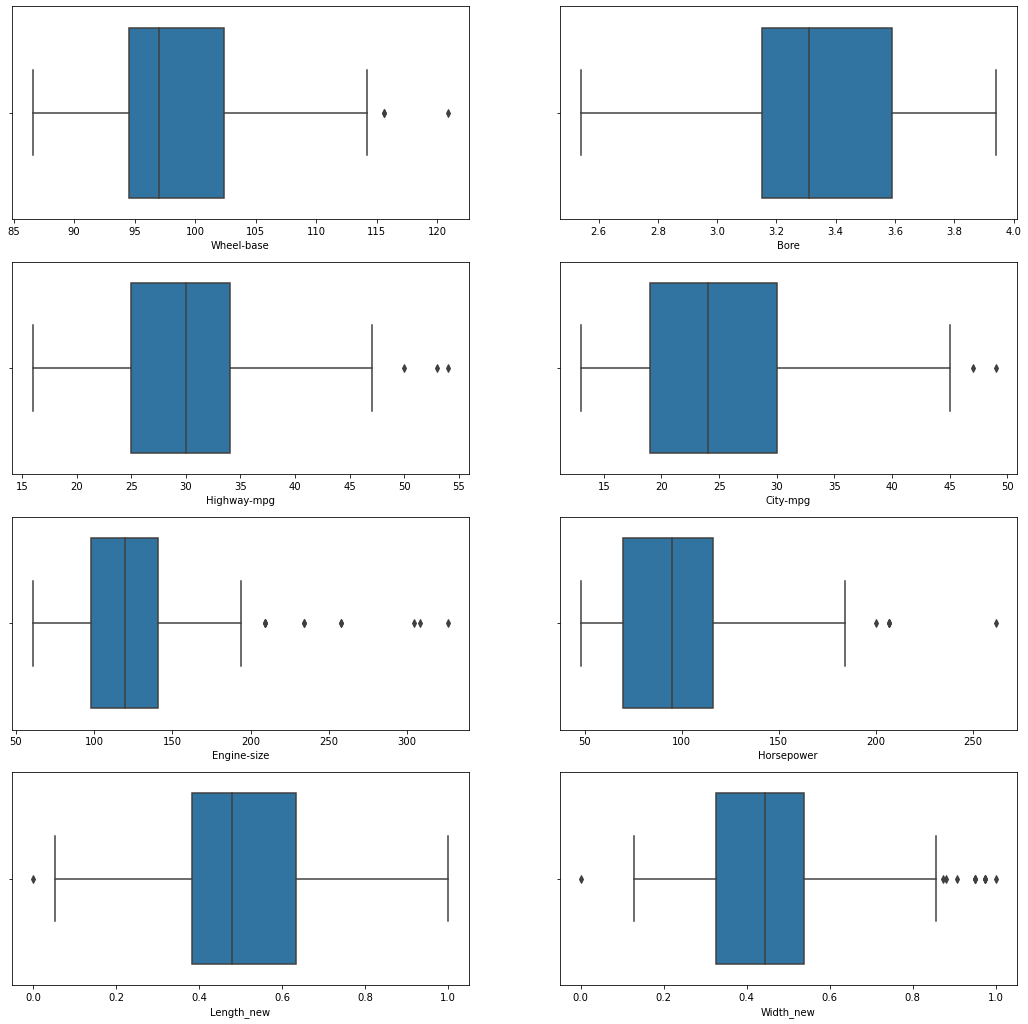

<Figure size 432x288 with 0 Axes>

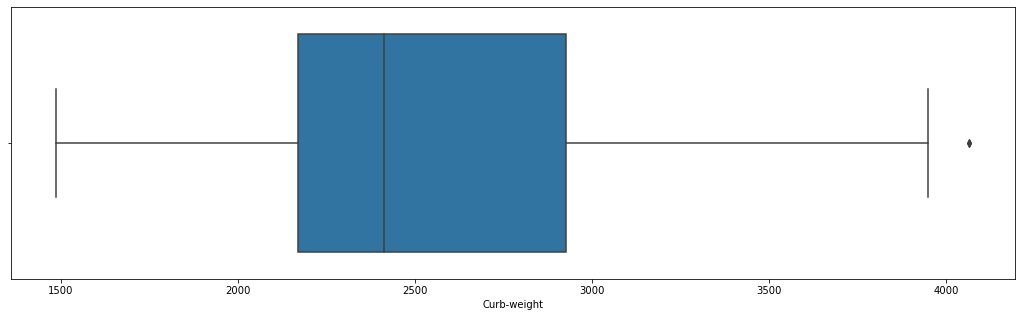

In [86]:
fig, axes = plt.subplots(4, 2, figsize=(18,18))

str_ = ['Wheel-base','Bore', 'Highway-mpg', 'City-mpg', 'Engine-size',
       'Horsepower','Length_new', 'Width_new']
n = 0
for val in range(4):
    sns.boxplot(data=data, x=str_[n], ax=axes[val, 0]);
    sns.boxplot(data=data, x=str_[n+1], ax=axes[val, 1]);
    n += 2

plt.show();
plt.clf();

plt.figure(figsize=(18, 5))
sns.boxplot(data=data, x='Curb-weight');

plt.show();

In [87]:
def check_outliers(label):
    temp = data[label]
    data_temp = data
    Q1, Q3 = np.percentile(temp, 25), np.percentile(temp, 75)
    IQR = Q3 - Q1
    up, low = Q3 + 1.5*IQR, Q1 - 1.5*IQR
    
    percent = (data[data[label] > up].shape[0] + data[data[label] < low].shape[0]) * 100 / temp.shape[0]
    
    data_temp = data_temp[(data_temp[label] <= up) & (data_temp[label] >= low)]
    
    return percent, abs(data_temp[label].mean() - temp.mean()), data_temp[label].mean()/  temp.mean(), abs(data_temp[label].median() - temp.median()), up, low

In [88]:
lst_percent, lst_mean, lst_percent_mean, lst_median, lst_up, lst_low = [], [], [], [], [], []
for i in str_:
    a, b, g, c, d, e = check_outliers(i)
    lst_percent.append(a)
    lst_mean.append(b)
    lst_median.append(c)
    lst_up.append(d)
    lst_low.append(e)
    lst_percent_mean.append(g)

df_outliers = pd.DataFrame(list(zip(lst_percent, lst_mean, lst_percent_mean, lst_median, lst_up, lst_low)), index = str_, 
                           columns =['Số lượng outliers chiếm (%)', 'Độ chênh lệch (mean)', 'Độ chênh lệch (mean %)', 'Độ chênh lệch (median)', 'Up', 'Low'])
df_outliers

,Số lượng outliers chiếm (%),Độ chênh lệch (mean),Độ chênh lệch (mean %),Độ chênh lệch (median),Up,Low
Wheel-base,1.492537,0.281358,0.997152,0.100000,114.250000,82.650000
Bore,0.000000,0.000000,1.000000,0.000000,4.250000,2.490000
Highway-mpg,1.492537,0.327981,0.989312,0.000000,47.500000,11.500000
City-mpg,0.995025,0.229356,0.990891,0.000000,46.500000,2.500000
Engine-size,4.975124,6.702847,0.947170,10.000000,205.500000,33.500000
Horsepower,2.487562,2.887933,0.972068,0.000000,185.000000,1.000000
Length_new,0.497512,0.002470,1.005000,0.000000,1.006716,0.009701
Width_new,5.472637,0.021961,0.954026,0.008547,0.858974,0.004274


In [89]:
data[str_].describe()

,Wheel-base,Bore,Highway-mpg,City-mpg,Engine-size,Horsepower,Length_new,Width_new
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,3.335075,30.686567,25.179104,126.875622,103.393035,0.494045,0.477697
std,6.066366,0.270102,6.815150,6.423220,41.546834,37.365623,0.183913,0.179613
min,86.600000,2.540000,16.000000,13.000000,61.000000,48.000000,0.000000,0.000000
25%,94.500000,3.150000,25.000000,19.000000,98.000000,70.000000,0.383582,0.324786
50%,97.000000,3.310000,30.000000,24.000000,120.000000,95.000000,0.479104,0.444444
75%,102.400000,3.590000,34.000000,30.000000,141.000000,116.000000,0.632836,0.538462
max,120.900000,3.940000,54.000000,49.000000,326.000000,262.000000,1.000000,1.000000


### Kết luận: 
- Số lượng outliers trong dữ liệu chiếm tỉ lệ nhỏ
- Độ chênh lệch của mean khi có và không có outliers cũng nhỏ
=> Không cần thiết phải loại bỏ outliers

In [90]:
data.columns

Index(['Make', 'Body-style', 'Wheel-base', 'Curb-weight', 'Engine-size',
       'Bore', 'Horsepower', 'City-mpg', 'Highway-mpg', 'Price',
       'Num-of-Cylinders-number', 'fwd', 'not-fwd', 'another_fuel_system',
       'mpfi', 'Width_new', 'Length_new'],
      dtype='object')

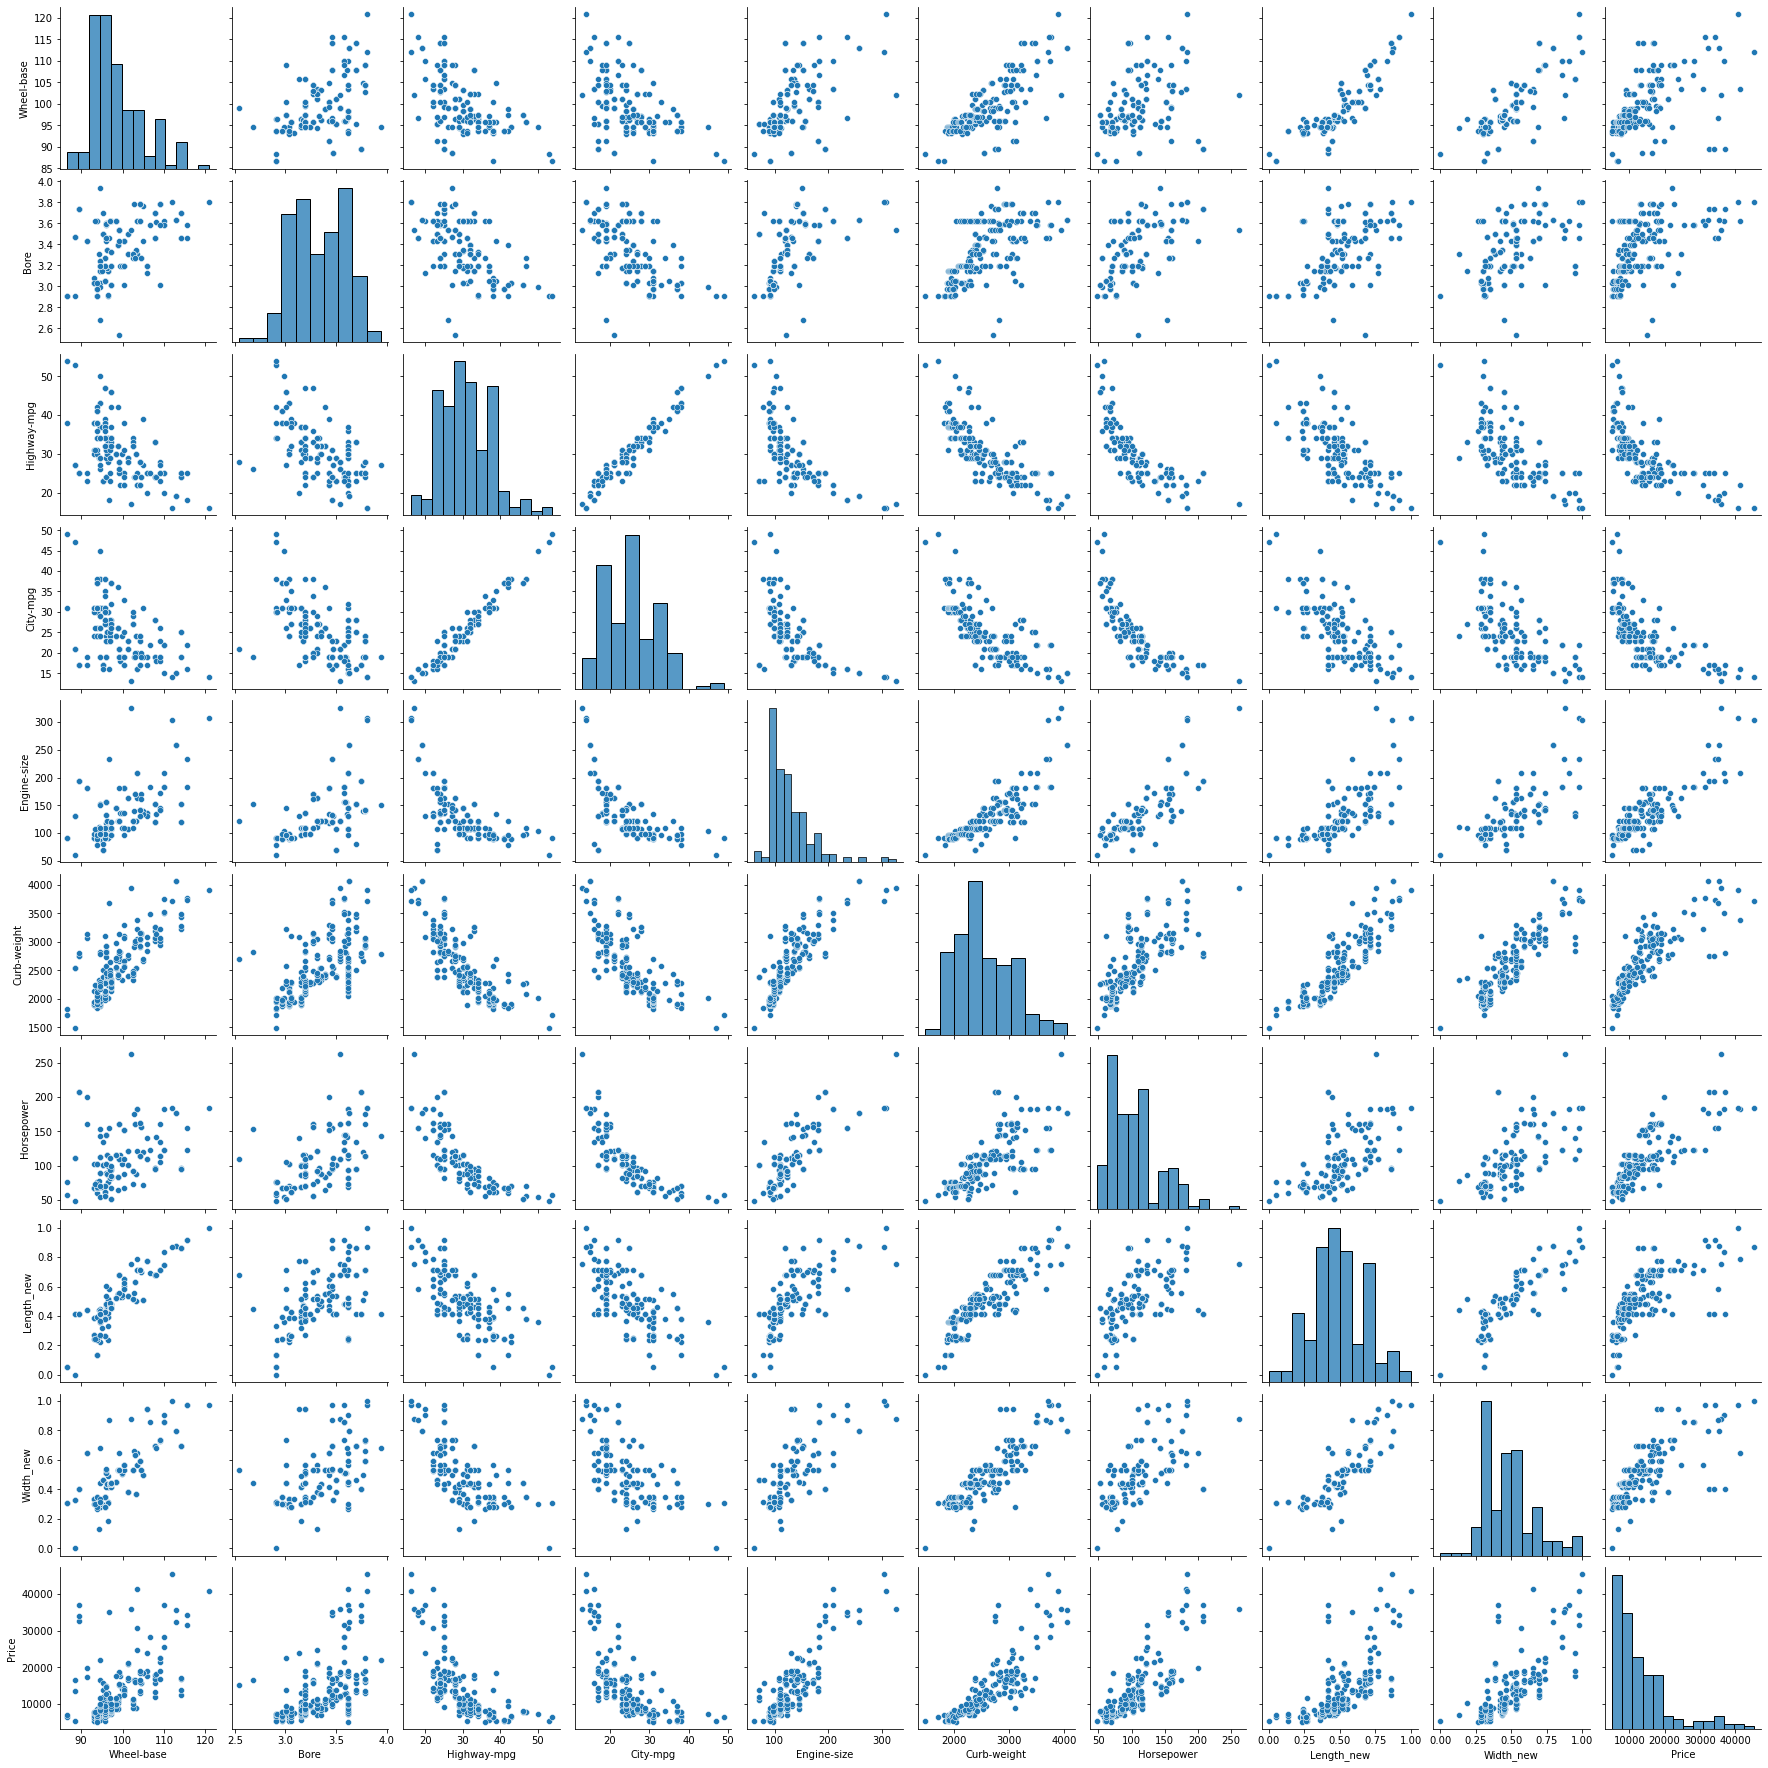

In [91]:
label_name = ['Wheel-base','Bore', 'Highway-mpg', 'City-mpg', 'Engine-size', 'Curb-weight',
       'Horsepower','Length_new', 'Width_new', 'Price']
sns.pairplot(data[label_name]);

## Model Evaluation

In [92]:
def MultiLinearRegression(X_train, y_train, X_test, y_test, inputs, output):
    lre=LinearRegression()
    lre.fit(X_train, y_train)
    
    #find R^2
    r_2_train = lre.score(X_train, y_train)
    r_2_test = lre.score(X_test, y_test)
    
    #find variance score
    variance = lre.score(inputs, output)
    
    #find MSE
    Yhat_test = lre.predict(X_test) 
    mse = mean_squared_error(y_test, Yhat_test)
    rmse = mse ** (1/2)
            
    return ("{:.3f}".format(r_2_train), "{:.3f}".format(r_2_test), "{:.2f}".format(rmse), "{:.2f}".format(variance))

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support as score

x_train, x_test, y_train, y_test = train_test_split(data[str_], data["Price"], test_size=0.2, random_state=41)
a, b, c, d = MultiLinearRegression(x_train, y_train, x_test, y_test, data[str_], data["Price"])

In [94]:
print('R^2 train score:', a)
print('R^2 test score:', b)
print('Rmse:', c)
print('Variance score:', d)

R^2 train score: 0.813
R^2 test score: 0.808
Rmse: 3326.69
Variance score: 0.81


## Mô hình với Standard Scaler

In [97]:
scale_data.head()

,Height,Width,Length,Height_new,Width_new,Length_new
0,48.8,64.1,168.8,0.083333,0.324786,0.413433
1,48.8,64.1,168.8,0.083333,0.324786,0.413433
2,52.4,65.5,171.2,0.383333,0.444444,0.449254
3,54.3,66.2,176.6,0.541667,0.504274,0.529851
4,54.3,66.4,176.6,0.541667,0.521368,0.529851


In [100]:
scale_data.drop(['Height_new','Width_new','Length_new'], axis = 1, inplace = True)
scale_data.head()

,Height,Width,Length
0,48.8,64.1,168.8
1,48.8,64.1,168.8
2,52.4,65.5,171.2
3,54.3,66.2,176.6
4,54.3,66.4,176.6


In [101]:
scaler = preprocessing.StandardScaler()
sd_scaler = scaler.fit_transform(scale_data)
df_scaler = pd.DataFrame(sd_scaler, columns=['Height_new', 'Width_new', 'Length_new'])
df_scaler.head()

,Height_new,Width_new,Length_new
0,-2.034081,-0.853460,-0.439409
1,-2.034081,-0.853460,-0.439409
2,-0.559713,-0.185597,-0.244152
3,0.218425,0.148335,0.195176
4,0.218425,0.243744,0.195176


In [102]:
scale_data[['Height_new', 'Width_new', 'Length_new']] = df_scaler[['Height_new', 'Width_new', 'Length_new']]
scale_data.head()

,Height,Width,Length,Height_new,Width_new,Length_new
0,48.8,64.1,168.8,-2.034081,-0.853460,-0.439409
1,48.8,64.1,168.8,-2.034081,-0.853460,-0.439409
2,52.4,65.5,171.2,-0.559713,-0.185597,-0.244152
3,54.3,66.2,176.6,0.218425,0.148335,0.195176
4,54.3,66.4,176.6,0.218425,0.243744,0.195176


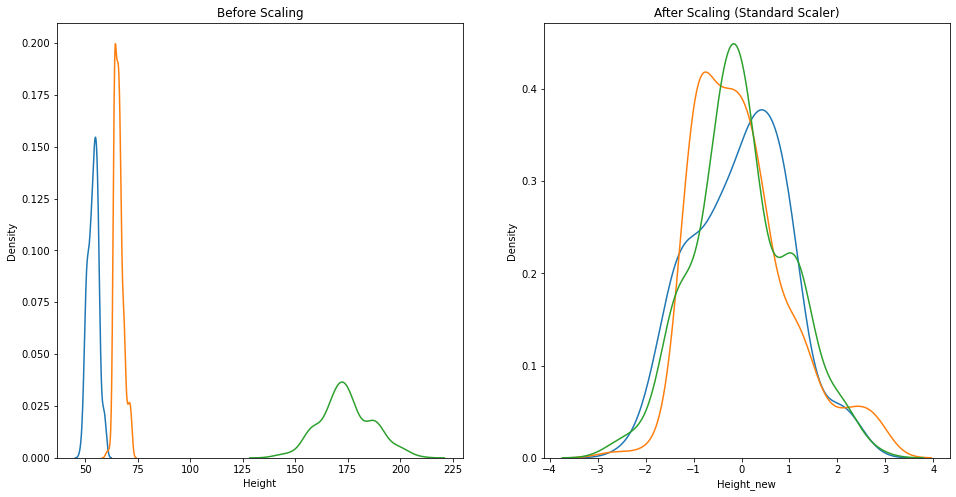

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize= (16,8))
ax1.set_title('Before Scaling')
sns.kdeplot(scale_data['Height'], ax = ax1)
sns.kdeplot(scale_data['Width'], ax = ax1)
sns.kdeplot(scale_data['Length'], ax = ax1)
ax2.set_title('After Scaling (Standard Scaler)')
sns.kdeplot(scale_data['Height_new'], ax = ax2)
sns.kdeplot(scale_data['Width_new'], ax = ax2)
sns.kdeplot(scale_data['Length_new'], ax = ax2)

In [105]:
data.drop(['Width_new','Length_new'], axis = 1 , inplace = True)
data.head()

,Make,Body-style,Wheel-base,Curb-weight,Engine-size,Bore,Horsepower,City-mpg,Highway-mpg,Price,Num-of-Cylinders-number,fwd,not-fwd,another_fuel_system,mpfi
0,alfa-romero,convertible,88.6,2548,130,3.47,111,21,27,13495.0,4,0,1,0,1
1,alfa-romero,convertible,88.6,2548,130,3.47,111,21,27,16500.0,4,0,1,0,1
2,alfa-romero,hatchback,94.5,2823,152,2.68,154,19,26,16500.0,6,0,1,0,1
3,audi,sedan,99.8,2337,109,3.19,102,24,30,13950.0,4,1,0,0,1
4,audi,sedan,99.4,2824,136,3.19,115,18,22,17450.0,5,0,1,0,1


In [106]:
data[['Width_new','Length_new']] = scale_data[['Width_new','Length_new']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     201 non-null    object 
 1   Body-style               201 non-null    object 
 2   Wheel-base               201 non-null    float64
 3   Curb-weight              201 non-null    int64  
 4   Engine-size              201 non-null    int64  
 5   Bore                     201 non-null    float64
 6   Horsepower               201 non-null    int64  
 7   City-mpg                 201 non-null    int64  
 8   Highway-mpg              201 non-null    int64  
 9   Price                    201 non-null    float64
 10  Num-of-Cylinders-number  201 non-null    int64  
 11  fwd                      201 non-null    uint8  
 12  not-fwd                  201 non-null    uint8  
 13  another_fuel_system      201 non-null    uint8  
 14  mpfi                     2

In [107]:
x_train, x_test, y_train, y_test = train_test_split(data[str_], data["Price"], test_size=0.2, random_state=41)
a, b, c, d = MultiLinearRegression(x_train, y_train, x_test, y_test, data[str_], data["Price"])

In [108]:
print('R^2 train score:', a)
print('R^2 test score:', b)
print('Rmse:', c)
print('Variance score:', d)

R^2 train score: 0.813
R^2 test score: 0.808
Rmse: 3326.69
Variance score: 0.81


### Nhận xét
Không có sự thay đổi đáng kể khi áp dụng Standard Scaler so với MinMaxScaler

## Mô hình với Robust Scaler

In [109]:
scale_data.drop(['Height_new','Width_new','Length_new'], axis = 1, inplace = True)
scale_data.head()

,Height,Width,Length
0,48.8,64.1,168.8
1,48.8,64.1,168.8
2,52.4,65.5,171.2
3,54.3,66.2,176.6
4,54.3,66.4,176.6


In [110]:
scaler = preprocessing.RobustScaler()
rb_scaler = scaler.fit_transform(scale_data)
df_scaler = pd.DataFrame(rb_scaler, columns=['Height_new', 'Width_new', 'Length_new'])
df_scaler.head()

,Height_new,Width_new,Length_new
0,-1.514286,-0.56,-0.263473
1,-1.514286,-0.56,-0.263473
2,-0.485714,0.00,-0.119760
3,0.057143,0.28,0.203593
4,0.057143,0.36,0.203593


In [111]:
scale_data[['Height_new', 'Width_new', 'Length_new']] = df_scaler[['Height_new', 'Width_new', 'Length_new']]
scale_data.head()

,Height,Width,Length,Height_new,Width_new,Length_new
0,48.8,64.1,168.8,-1.514286,-0.56,-0.263473
1,48.8,64.1,168.8,-1.514286,-0.56,-0.263473
2,52.4,65.5,171.2,-0.485714,0.00,-0.119760
3,54.3,66.2,176.6,0.057143,0.28,0.203593
4,54.3,66.4,176.6,0.057143,0.36,0.203593


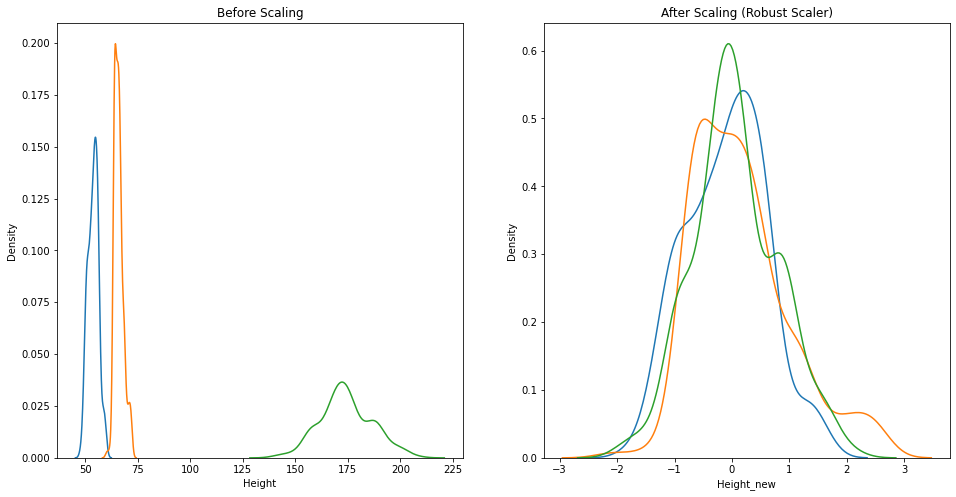

In [112]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize= (16,8))
ax1.set_title('Before Scaling')
sns.kdeplot(scale_data['Height'], ax = ax1)
sns.kdeplot(scale_data['Width'], ax = ax1)
sns.kdeplot(scale_data['Length'], ax = ax1)
ax2.set_title('After Scaling (Robust Scaler)')
sns.kdeplot(scale_data['Height_new'], ax = ax2)
sns.kdeplot(scale_data['Width_new'], ax = ax2)
sns.kdeplot(scale_data['Length_new'], ax = ax2)

In [113]:
data.drop(['Width_new','Length_new'], axis = 1 , inplace = True)
data.head()

,Make,Body-style,Wheel-base,Curb-weight,Engine-size,Bore,Horsepower,City-mpg,Highway-mpg,Price,Num-of-Cylinders-number,fwd,not-fwd,another_fuel_system,mpfi
0,alfa-romero,convertible,88.6,2548,130,3.47,111,21,27,13495.0,4,0,1,0,1
1,alfa-romero,convertible,88.6,2548,130,3.47,111,21,27,16500.0,4,0,1,0,1
2,alfa-romero,hatchback,94.5,2823,152,2.68,154,19,26,16500.0,6,0,1,0,1
3,audi,sedan,99.8,2337,109,3.19,102,24,30,13950.0,4,1,0,0,1
4,audi,sedan,99.4,2824,136,3.19,115,18,22,17450.0,5,0,1,0,1


In [115]:
data[['Width_new','Length_new']] = scale_data[['Width_new','Length_new']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     201 non-null    object 
 1   Body-style               201 non-null    object 
 2   Wheel-base               201 non-null    float64
 3   Curb-weight              201 non-null    int64  
 4   Engine-size              201 non-null    int64  
 5   Bore                     201 non-null    float64
 6   Horsepower               201 non-null    int64  
 7   City-mpg                 201 non-null    int64  
 8   Highway-mpg              201 non-null    int64  
 9   Price                    201 non-null    float64
 10  Num-of-Cylinders-number  201 non-null    int64  
 11  fwd                      201 non-null    uint8  
 12  not-fwd                  201 non-null    uint8  
 13  another_fuel_system      201 non-null    uint8  
 14  mpfi                     2

In [116]:
x_train, x_test, y_train, y_test = train_test_split(data[str_], data["Price"], test_size=0.2, random_state=41)
a, b, c, d = MultiLinearRegression(x_train, y_train, x_test, y_test, data[str_], data["Price"])

In [117]:
print('R^2 train score:', a)
print('R^2 test score:', b)
print('Rmse:', c)
print('Variance score:', d)

R^2 train score: 0.813
R^2 test score: 0.808
Rmse: 3326.69
Variance score: 0.81


### Nhận xét:
Mô hình sau khi áp dụng Robust Scaler cho kết quả evaluation không thay đổi nhiều so với MinMaxScaler và Standard Scaler